,guest,hotel,final_price,guest_satisfaction
0,guest_856,hotel_300,€186.01,2
1,guest_534,hotel_321,€49.14,1
2,guest_873,hotel_55,€233.77,2
3,guest_1198,hotel_154,€228.42,1
4,guest_1180,hotel_94,€108.64,2


,Metric,Value
0,Total Guests Allocated,"3,937"
1,Total Rooms Filled,"3,937"
2,Number of Hotels Utilized,389
3,Full Capacity Hotels Count,321
4,Overall Revenue Earned,"€627,415.6100"
5,Average Earnings Per Hotel,"€1,612.8900"
6,Average Guest Satisfaction,3.44


C:\Users\irpay\results\random_allocation_results.csv

C:\Users\irpay\results\summary_report_random_allocation.txt

,guest,hotel,final_price,guest_satisfaction
0,guest_1,hotel_168,€271.18,1
1,guest_2,hotel_369,€133.00,1
2,guest_3,hotel_157,€60.45,1
3,guest_4,hotel_235,€136.00,1
4,guest_5,hotel_121,€50.40,1


,Metric,Value
0,Total Guests Allocated,"3,975"
1,Total Rooms Filled,"3,975"
2,Number of Hotels Utilized,400
3,Full Capacity Hotels Count,255
4,Overall Revenue Earned,"€643,597.5300"
5,Average Earnings Per Hotel,"€1,608.9900"
6,Average Guest Satisfaction,1.32


C:\Users\irpay\results\customer_preference_results.csv

C:\Users\irpay\results\summary_report_customer_preference.txt

,guest,hotel,final_price,guest_satisfaction
0,guest_1,hotel_22,€55.51,5
1,guest_2,hotel_26,€55.00,4
2,guest_3,hotel_6,€53.94,2
3,guest_4,hotel_321,€54.00,5
4,guest_5,hotel_121,€50.40,1


,Metric,Value
0,Total Guests Allocated,"3,925"
1,Total Rooms Filled,"3,925"
2,Number of Hotels Utilized,388
3,Full Capacity Hotels Count,319
4,Overall Revenue Earned,"€564,085.0800"
5,Average Earnings Per Hotel,"€1,453.8300"
6,Average Guest Satisfaction,3.42


C:\Users\irpay\results\price_allocation_results.csv

C:\Users\irpay\results\summary_report_price_allocation.txt

,guest,hotel,final_price,guest_satisfaction
0,guest_1,hotel_269,€115.57,5
1,guest_2,hotel_79,€75.00,4
2,guest_3,hotel_179,€159.03,3
3,guest_4,hotel_212,€205.00,5
4,guest_5,hotel_85,€263.70,5


,Metric,Value
0,Total Guests Allocated,"3,874"
1,Total Rooms Filled,"3,874"
2,Number of Hotels Utilized,397
3,Full Capacity Hotels Count,344
4,Overall Revenue Earned,"€629,523.3500"
5,Average Earnings Per Hotel,"€1,585.7000"
6,Average Guest Satisfaction,3.46


C:\Users\irpay\results\availability_allocation_results.csv

C:\Users\irpay\results\summary_report_availability_allocation.txt

,Strategy,Total Guests Allocated,Total Rooms Filled,Number of Hotels Utilized,Full Capacity Hotels Count,Overall Revenue Earned,Average Earnings Per Hotel,Average Guest Satisfaction
0,Random,3937.000000,3937.000000,389.000000,321.000000,627415.610000,1612.890000,3.440000
1,Customer Preference,3975.000000,3975.000000,400.000000,255.000000,643597.530000,1608.990000,1.320000
2,Price,3925.000000,3925.000000,388.000000,319.000000,564085.080000,1453.830000,3.420000
3,Availability,3874.000000,3874.000000,397.000000,344.000000,629523.350000,1585.700000,3.460000


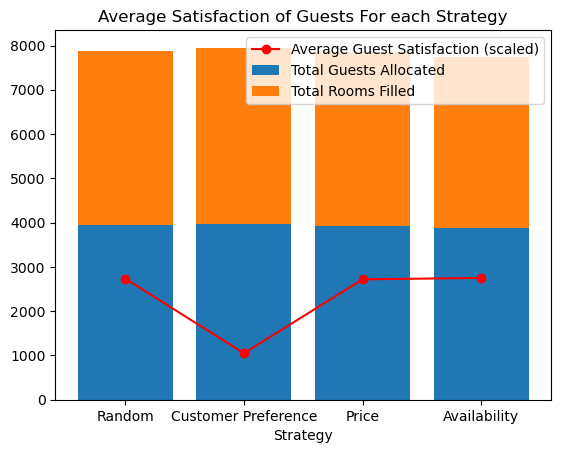

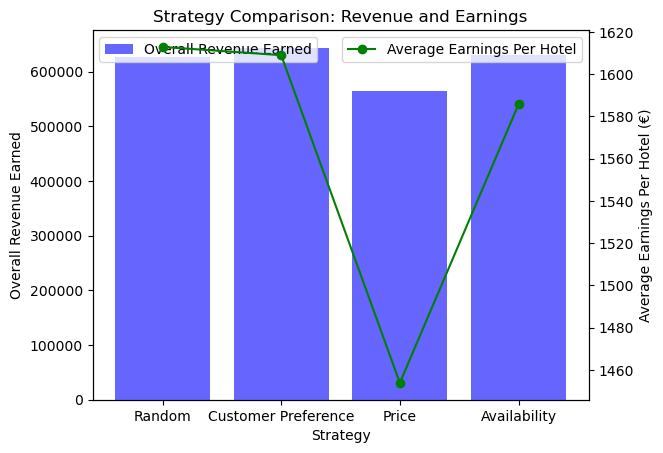

In [30]:
from HotelAllocation import HotelAllocation  # Ensure you import your class
import pandas as pd
from IPython.display import display, HTML


def main():
    # Paths to the data files
    hotels_path = 'C:/Users/irpay/OneDrive/Documents/GitHub/payam/hotels.xlsx'
    guests_path = 'C:/Users/irpay/OneDrive/Documents/GitHub/payam/guests.xlsx'
    preferences_path = 'C:/Users/irpay/OneDrive/Documents/GitHub/payam/preferences.xlsx'

    # Create an instance of HotelAllocation
    hotel_allocator = HotelAllocation(hotels_path, guests_path, preferences_path)

    # Execute Random Allocation Strategy

    random_allocation_df = hotel_allocator.random_allocation()
    random_results_df = hotel_allocator.calculate_metrics(random_allocation_df)
    display(HTML("<h2>Random Allocation Strategy Results</h2>"))
    hotel_allocator.display_with_description("<b>Table 1: Random Allocation Results Summary</b><br>This table shows the distribution of guests across various hotels, the price paid, and their satisfaction scores.", random_allocation_df.head(), "*Note: Only the first 5 rows are displayed for brevity. For the complete data, please use the download link below.*")
    hotel_allocator.display_with_description("<b>Table 2: Random Allocation Performance Metrics</b><br>This table provides key metrics summarizing the allocation's effectiveness, including total guests allocated, revenue earned, and average guest satisfaction.", random_results_df, "*Note: Guest satisfaction scores range from 1 to 5, with 1 being the guest's top choice and 5 being around their last preference.*")
    csv_path, txt_path = hotel_allocator.save_files(random_allocation_df, random_results_df, 'results', 'random_allocation')
    hotel_allocator.display_download_links(csv_path, txt_path)
    
    # Customer Preference Allocation Strategy

    customer_preference_allocation_df = hotel_allocator.customer_preference_allocation()
    customer_preference_results_df = hotel_allocator.calculate_metrics(customer_preference_allocation_df)
    display(HTML("<h2>Customer Preference Allocation Strategy Results</h2>"))
    hotel_allocator.display_with_description("<b>Table 3: Customer Preference Allocation Results Summary</b><br>This table shows the distribution of guests across various hotels, the price paid, and their satisfaction scores.", customer_preference_allocation_df.head(), "*Note: Only the first 5 rows are displayed for brevity. For the complete data, please use the download link below.*")
    hotel_allocator.display_with_description("<b>Table 4: Customer Preference Allocation Performance Metrics</b><br>This table provides key metrics summarizing the allocation's effectiveness, including total guests allocated, revenue earned, and average guest satisfaction.", customer_preference_results_df, "*Note: Guest satisfaction scores range from 1 to 5, with 1 being the guest's top choice and 5 being around their last preference.*")
    csv_path, txt_path = hotel_allocator.save_files(customer_preference_allocation_df, customer_preference_results_df, 'results', 'customer_preference')
    hotel_allocator.display_download_links(csv_path, txt_path)

    # Price Allocation Strategy

    price_allocation_df = hotel_allocator.price_allocation()
    price_allocation_results_df = hotel_allocator.calculate_metrics(price_allocation_df)
    display(HTML("<h2>Price Allocation Strategy Results</h2>"))
    hotel_allocator.display_with_description("<b>Table 5: Price Allocation Results Summary</b><br>This table shows the distribution of guests across various hotels, the price paid, and their satisfaction scores.", price_allocation_df.head(), "*Note: Only the first 5 rows are displayed for brevity. For the complete data, please use the download link below.*")
    hotel_allocator.display_with_description("<b>Table 6: Price Allocation Performance Metrics</b><br>This table provides key metrics summarizing the allocation's effectiveness, including total guests allocated, revenue earned, and average guest satisfaction.", price_allocation_results_df, "*Note: Guest satisfaction scores range from 1 to 5, with 1 being the guest's top choice and 5 being around their last preference.*")
    csv_path, txt_path = hotel_allocator.save_files(price_allocation_df, price_allocation_results_df, 'results', 'price_allocation')
    hotel_allocator.display_download_links(csv_path, txt_path)

    # Availability Allocation Strategy
    availability_allocation_df = hotel_allocator.availability_allocation()
    availability_allocation_results_df = hotel_allocator.calculate_metrics(availability_allocation_df)
    display(HTML("<h2>Availability Allocation Strategy Results</h2>"))
    hotel_allocator.display_with_description("<b>Table 7: Availability Allocation Results Summary</b><br>This table shows the distribution of guests across various hotels, the price paid, and their satisfaction scores.", availability_allocation_df.head(), "*Note: Only the first 5 rows are displayed for brevity. For the complete data, please use the download link below.*")
    hotel_allocator.display_with_description("<b>Table 8: Availability Allocation Performance Metrics</b><br>This table provides key metrics summarizing the allocation's effectiveness, including total guests allocated, revenue earned, and average guest satisfaction.", availability_allocation_results_df, "*Note: Guest satisfaction scores range from 1 to 5, with 1 being the guest's top choice and 5 being around their last preference.*")
    csv_path, txt_path = hotel_allocator.save_files(availability_allocation_df, availability_allocation_results_df, 'results', 'availability_allocation')
    hotel_allocator.display_download_links(csv_path, txt_path)
    
    

    # Extract metrics for each strategy
    random_metrics = hotel_allocator.extract_metrics(random_results_df)
    customer_preference_metrics = hotel_allocator.extract_metrics(customer_preference_results_df)
    price_allocation_metrics = hotel_allocator.extract_metrics(price_allocation_results_df)
    availability_allocation_metrics = hotel_allocator.extract_metrics(availability_allocation_results_df)

    # Create and concatenate dataframes for each strategy
    comparison_df = pd.DataFrame(columns=[
        'Strategy', 
        'Total Guests Allocated', 
        'Total Rooms Filled', 
        'Number of Hotels Utilized', 
        'Full Capacity Hotels Count', 
        'Overall Revenue Earned', 
        'Average Earnings Per Hotel', 
        'Average Guest Satisfaction'
    ])
    df_random = pd.DataFrame([{**{'Strategy': 'Random Allocation'}, **random_metrics}])
    df_customer_preference = pd.DataFrame([{**{'Strategy': 'Customer Preference Allocation'}, **customer_preference_metrics}])
    df_price_allocation = pd.DataFrame([{**{'Strategy': 'Price Allocation'}, **price_allocation_metrics}])
    df_availability_allocation = pd.DataFrame([{**{'Strategy': 'Availability Allocation'}, **availability_allocation_metrics}])
    comparison_df = pd.concat([comparison_df, df_random, df_customer_preference, df_price_allocation, df_availability_allocation], ignore_index=True)

    comparison_df = hotel_allocator.shorten_strategy_names(comparison_df)
    


    # HTML Description for the comparison table
    comparison_table_description = "<h2>Strategy Comparison Table</h2>" \
                                   "<p>This table compares the different allocation strategies based on various metrics, " \
                                   "such as total guests allocated, total rooms filled, and average guest satisfaction. " \
                                   "All values are rounded to four decimal places for clarity.</p>"


    # Display the comparison table with HTML formatting and post-description
    hotel_allocator.display_with_description(comparison_table_description, comparison_df, None)


    
    # Plotting Satisfaction and Revenue Charts
    hotel_allocator.plot_Satisfaction(comparison_df)
    hotel_allocator.plot_revenue_chart(comparison_df)

if __name__ == "__main__":
    main()
